## Final Project Submission


* Student name: Andi Osika
* Student pace: part time
* Scheduled project review date/time: na
* Instructor name: James Irving, PhD
* Blog post URL: TBD



![Covid19](https://raw.githubusercontent.com/andiosika/dsc-mod-3-project-v2-1-online-ds-pt-100719/master/c0481846-wuhan_novel_coronavirus_illustration-spl.jpg)

## Background:

Coronavirus disease (COVID-19) is an infectious disease caused by a newly (April, 2020) discovered coronavirus that has escalated into a global pandemic.

According to the [World Health Organization](https://www.who.int/health-topics/coronavirus#tab=tab_1), most people infected with the COVID-19 virus will experience mild to moderate respiratory illness and recover without requiring special treatment.  Older people, and those with underlying medical problems like cardiovascular disease, diabetes, chronic respiratory disease, and cancer are more likely to develop serious illness.

The best way to prevent and slow down transmission is be well informed about the COVID-19 virus, the disease it causes and how it spreads. In response, much data has been collected in various ways to further inform ways to slow the spread. 

This dataset was created by a project created by a UK based platform-solutions company called [Nexoid]( https://www.nexoid.com/). 

At the start of the pandemic, Nexoid noted that there was a lack of large datasets required to predict the spread and mortality of COVID-19. They took it upon themselves to create and share this dataset as an effort to better understand these factors. It is a not-for-profit project with the goal of providing researchers and governments the data needed to help understand and fight COVID-19.

The data is collected here: 
https://www.covid19survivalcalculator.com/

A risk of infection and mortality are returned to the user based on Nexoid's model which is not publicly sharded, yet recorded in this dataset post-hoc.  These values are reflected in the columns risk_infection and risk_mortality.

The intention of this classification project is to seek primary contributing factors for contracting covid19.

In [2]:
##Importing dataset
import pandas as pd
df = pd.read_csv("master_dataset4.csv")
pd.set_option('display.max_columns', 0)
df.head()

,survey_date,region,country,ip_latitude,ip_longitude,ip_accuracy,sex,age,height,weight,bmi,blood_type,smoking,alcohol,cannabis,amphetamines,cocaine,lsd,mdma,contacts_count,house_count,text_working,rate_government_action,rate_reducing_risk_single,rate_reducing_risk_house,rate_reducing_mask,covid19_positive,covid19_symptoms,covid19_contact,asthma,kidney_disease,compromised_immune,heart_disease,lung_disease,diabetes,hiv_positive,hypertension,other_chronic,prescription_medication,opinion_infection,opinion_mortality,risk_infection,risk_mortality
0,4/4/2020,NaN,US,35.9568,-86.5301,200.0,female,40_50,158,114,45.6,ap,quit0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,5.0,4,never,0,0,0,3.0,0,0,0,1,0,1,0,0,0,0,1,1,NaN,55.0,35.0,64.248,0.721
1,4/5/2020,NaN,US,39.6512,-82.6200,20.0,female,20_30,168,62,21.9,on,never,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,5.0,3,never,1,1,1,2.0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,15.0,15.0,57.549,0.016
2,4/5/2020,NaN,US,27.7723,-82.2767,10.0,female,0_10,136,44,23.7,bp,never,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,4.0,3,stopped,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,62.377,0.000
3,4/5/2020,NaN,US,39.6675,-77.5666,10.0,female,30_40,164,112,41.6,abn,quit5,-1.0,28.0,-1.0,-1.0,-1.0,-1.0,4.0,3,never,1,1,0,1.0,0,0,0,1,0,0,0,0,0,0,1,1,ACETAZOLAMIDE;GABAPENTIN;OMEPRAZOLE;VENLAFAXIN...,45.0,25.0,59.258,0.195
4,4/4/2020,NaN,US,41.3527,-81.7444,50.0,male,50_60,184,132,38.9,an,vape,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,10.0,4,travel critical,0,0,0,3.0,0,0,0,0,0,0,0,0,1,0,0,0,METFORMIN HYDROCHLORIDE,15.0,5.0,77.098,2.463


### Features and Descriptions:

**Feature** | **Description**
--|--
survey_date|The date the survey was submitted
region	
country |The country collected from IP address long, lat
ip_latitude	|ip latitude of device at time of survey
ip_longitude |ip longitude of device at time of survey	
ip_accuracy	|-n/a
sex	|Self reported sex
age	| Self reported age based on birthdate
height |Height in cm
weight | Weight in kg
bmi	| Body Mass Index as calculated from self-reported height and weight
blood_type	| Blood type
smoking	| reported smoking/vapeing habits (never, do, 1-5x, 6-20x, 20+, quit<5yrs, quit>5yrs, quit>10yrs
alcohol	| reported days of alcohol consuption in last 14 days 
cannabis | reported days of cannabis consumpiton in last 28 days
amphetamines | reported days of amphetamine consumpiton in last 28 days	
cocaine	| reported days of cocaine consumpiton in last 28 days
lsd	| reported days of lsd consumpiton in last 28 days
mdma | reported days of mdma(ecstacy) consumpiton in last 28 days	
contacts_count	| reported contacts in the last week (1-20 and 20+)
house_count	| how many people live in the subjects dwelling
text_working | work/school travel behaviors (0-5 never did, always did, have stopped, critical only, still do)
rate_government_action	| scale of attitude that government is taking covid-19 seriously (disagree, neutral, agree)
rate_reducing_risk_single | scale of self-assesment to reduce risk(social distancing, hand washing) (disagree, neutral, agree)
rate_reducing_risk_house | scale of assessesed co-habitators risk reduction (social distancing, hand washing)(disagree, neutral, agree)	
rate_reducing_mask	| scale of how often a mask is worn outside dwelling 1-5 rarely, sometimes, usually)
covid19_positive | A binomial value o=no, 1=yes to the question  "Do you have?"	
covid19_symptoms | A binomial value o=no, 1=yes to the question  "Do you have?"	
covid19_contact	|A binomial value 0=no, 1=yes to the question "Have you been in contact with someone who has tested positive?"
asthma | A binomial value 0=no, 1=yes to the question "Do you have?"
kidney_disease | A binomial value 0=no, 1=yes to the question "Do you have?"
compromised_immune |  A binomial value 0=no, 1=yes to the question "Do you have?"
heart_disease | A binomial value 0=no, 1=yes to the question "Do you have?"	
lung_disease | A binomial value 0=no, 1=yes to the question "Do you have?"
diabetes | A binomial value 0=no, 1=yes to the question "Do you have?"
hiv_positive | A binomial value 0=no, 1=yes to the question "Do you have?"
hypertension | A binomial value 0=no, 1=yes to the question "Do you have?"
other_chronic | A binomial value 0=no, 1=yes to the question "Do you have?"
prescription_medication | Reported prescription medications
opinion_infection | A binomial value 0=no, 1=yes to the question "Do you have?"
opinion_mortality | A binomial value 0=no, 1=yes to the question "Do you have?"
risk_infection | cacl'd risk for infection (based on their models, dropped since this value is calculated after data collection)
risk_mortality | cacl'd risk for mortality (based on their models)

### Software Package Installs:

In [3]:
# other imports 
import matplotlib.pyplot as plt

import seaborn as sns
from pandas_profiling import ProfileReport
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
import functions as fn
import importlib

from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

C:\Users\aosika\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\aosika\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


2020-04-23 14:47:58.768241-07:00
[i] Timer started at04/23/20 - 02:47 PM
[i] Timer ended at 04/23/20 - 02:47 PM
- Total time = 0:00:00


## Inspecting the dataset:

This set of data contains just over 619K entries and has 43 columns of both numeric and categorical data.  Because of the size of this dataset, pandas profiling was used to inform potential considerations for dataset selection and develop a strategy to manage preprocessing of a set this size.

In [4]:
profile = ProfileReport(df, minimal=True)
profile

C:\Users\aosika\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\IPython\core\display.py:694: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619027 entries, 0 to 619026
Data columns (total 43 columns):
survey_date                  619027 non-null object
region                       42296 non-null object
country                      619010 non-null object
ip_latitude                  619027 non-null float64
ip_longitude                 619027 non-null float64
ip_accuracy                  619026 non-null float64
sex                          619027 non-null object
age                          619027 non-null object
height                       619027 non-null int64
weight                       619027 non-null int64
bmi                          619027 non-null float64
blood_type                   619027 non-null object
smoking                      617174 non-null object
alcohol                      617174 non-null float64
cannabis                     606540 non-null float64
amphetamines                 591599 non-null float64
cocaine                      589898 non-null float64


### Data Background Observation: 
> The data was provided by subjects from 173 countries.  It is noted that 87% of the data comes from the US.  The next top provider of data is Canada ~5% , followed by the United Kingdom ~2.3%:

In [6]:
print(df['country'].value_counts(normalize=True))
countriesdf= pd.DataFrame(df['country'].value_counts())
countriesdf.head(20)

US    0.878483
CA    0.049560
GB    0.023211
AU    0.011354
BR    0.005552
        ...   
TG    0.000002
SR    0.000002
YE    0.000002
GI    0.000002
ML    0.000002
Name: country, Length: 173, dtype: float64


,country
US,543790
CA,30678
GB,14368
AU,7028
BR,3437
MX,1740
DE,1415
PH,1117
RU,831
NZ,705


### Inspecting correlations:

In [7]:
df.corr()['covid19_positive'].sort_values(ascending=False)

covid19_positive             1.000000
risk_infection               0.198632
covid19_symptoms             0.089861
opinion_infection            0.054837
covid19_contact              0.050774
risk_mortality               0.014074
mdma                         0.012152
heart_disease                0.007975
weight                       0.007503
lsd                          0.007137
height                       0.006999
cocaine                      0.006833
rate_reducing_mask           0.006201
ip_longitude                 0.006122
diabetes                     0.005700
kidney_disease               0.004725
other_chronic                0.004638
compromised_immune           0.004308
bmi                          0.004280
hypertension                 0.004055
hiv_positive                 0.003993
contacts_count               0.003741
ip_latitude                  0.003448
lung_disease                 0.003296
amphetamines                 0.002425
asthma                       0.001956
house_count 

In [8]:
df.corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1) 

,ip_latitude,ip_longitude,ip_accuracy,height,weight,bmi,alcohol,cannabis,amphetamines,cocaine,lsd,mdma,contacts_count,house_count,rate_government_action,rate_reducing_risk_single,rate_reducing_risk_house,rate_reducing_mask,covid19_positive,covid19_symptoms,covid19_contact,asthma,kidney_disease,compromised_immune,heart_disease,lung_disease,diabetes,hiv_positive,hypertension,other_chronic,opinion_infection,opinion_mortality,risk_infection,risk_mortality
ip_latitude,1.0,-0.47,-0.035,0.0054,0.025,0.024,-0.0015,0.034,-0.0043,0.0033,-0.0053,-0.015,-0.022,-0.01,0.026,0.0078,0.0062,-0.023,0.0034,0.0096,0.0052,0.0078,-0.00053,0.0046,-0.0045,0.0018,0.0016,-0.01,-0.0054,0.0042,0.031,0.0072,0.025,-0.004
ip_longitude,-0.47,1.0,-0.018,0.027,-0.044,-0.058,-0.0067,-0.052,-0.008,-0.00027,-0.0037,0.016,-0.029,-0.016,0.071,0.011,0.0086,-0.029,0.0061,0.0088,-0.0084,-0.001,-0.0014,-0.013,-5.9e-06,-0.0033,-0.018,0.00038,-0.027,0.00099,-0.024,-0.0062,-0.04,-0.012
ip_accuracy,-0.035,-0.018,1.0,0.0081,0.016,0.014,-0.025,0.008,0.014,0.0067,0.0031,0.0022,0.098,0.036,0.011,-0.034,-0.027,-0.021,-0.0013,-0.003,0.007,-0.0089,0.0025,-0.003,0.00049,0.0031,-0.00014,-0.0014,0.0021,-0.0082,0.00022,-0.00086,0.1,-0.015
height,0.0054,0.027,0.0081,1.0,0.39,-0.096,0.11,0.047,0.013,0.043,0.052,0.047,0.013,-0.06,0.013,-0.012,0.029,-0.046,0.007,-0.0065,-0.0055,-0.067,0.0015,-0.057,0.025,-0.0065,0.028,0.036,0.056,-0.053,-0.031,-0.096,0.036,0.085
weight,0.025,-0.044,0.016,0.39,1.0,0.87,-0.066,-0.012,-0.0019,-0.0032,-0.0009,-0.0059,0.055,0.00021,-0.019,-0.014,-0.0029,-0.029,0.0075,0.0036,-0.0046,0.047,0.012,0.0096,0.041,0.012,0.17,0.0094,0.22,0.02,0.018,0.1,0.065,0.065
bmi,0.024,-0.058,0.014,-0.096,0.87,1.0,-0.13,-0.033,-0.0071,-0.023,-0.024,-0.026,0.053,0.029,-0.027,-0.0085,-0.018,-0.0073,0.0043,0.0072,-0.0027,0.085,0.012,0.04,0.031,0.016,0.17,-0.0066,0.21,0.049,0.033,0.16,0.052,0.027
alcohol,-0.0015,-0.0067,-0.025,0.11,-0.066,-0.13,1.0,0.076,0.037,0.11,0.096,0.11,-0.011,-0.059,-0.011,-0.015,0.0059,-0.038,-0.0041,-0.0044,0.0058,-0.028,-0.012,-0.05,-0.013,-0.014,-0.071,0.011,-0.0078,-0.053,0.025,-0.076,-0.022,0.024
cannabis,0.034,-0.052,0.008,0.047,-0.012,-0.033,0.076,1.0,0.083,0.17,0.21,0.2,0.012,-0.0073,-0.09,-0.015,-0.021,-0.0054,-0.0044,0.013,-0.021,0.033,0.002,0.026,-0.0052,0.014,-0.022,0.025,-0.031,0.03,0.038,0.05,-0.0053,-0.043
amphetamines,-0.0043,-0.008,0.014,0.013,-0.0019,-0.0071,0.037,0.083,1.0,0.18,0.2,0.21,0.028,0.011,-0.013,-0.041,-0.035,-0.0091,0.0024,0.013,0.011,0.011,0.0095,0.017,0.0085,0.016,0.0025,0.031,0.011,0.015,0.016,0.021,0.035,0.015
cocaine,0.0033,-0.00027,0.0067,0.043,-0.0032,-0.023,0.11,0.17,0.18,1.0,0.44,0.47,0.027,0.004,-0.028,-0.063,-0.049,-0.027,0.0068,0.014,0.0054,0.011,0.018,0.013,0.014,0.019,0.0011,0.059,-0.0064,0.0014,0.012,0.0096,0.041,0.033


Initial visual inspection of null values indicates that region and prescription medication are sparsely populated.  The opinion_infections and opinion_mortality columns are also a little 'light' in terms of responses. Other than that, there doesn't seem to be be any clear, apparent patterns for incomplete data. (See below)

## Preprocessing:

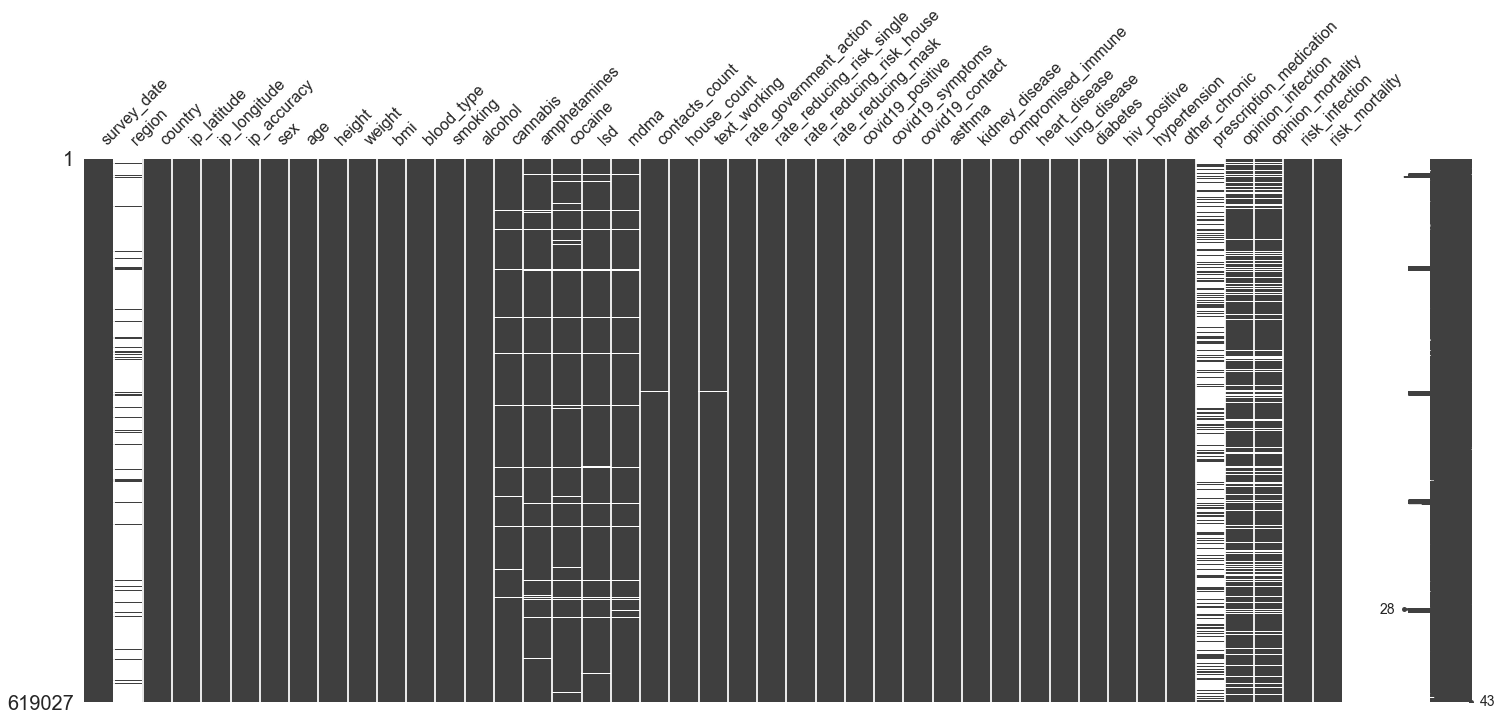

In [9]:
import missingno
missingno.matrix(df)

Aditional inspection shows that there are quite a few columns with less than 5% null values.  Since this dataset is so large, it seems reasonable to remove these.  Details follow:

In [10]:
nulls = pd.DataFrame(df.isna().sum()/len(df)*100)
nulls = pd.DataFrame(nulls.reset_index())
nulls.columns=['variable', '%_Null']
nulls.sort_values(by='%_Null', ascending=False, inplace=True)
nulls


,variable,%_Null
1,region,93.167342
38,prescription_medication,68.800876
40,opinion_mortality,17.445604
39,opinion_infection,17.445604
16,cocaine,4.705611
15,amphetamines,4.430825
17,lsd,4.089644
18,mdma,3.513255
14,cannabis,2.017198
21,text_working,0.683654


In [11]:
cols_to_drop_na = ['country','ip_accuracy','smoking', 'alcohol', 'cannabis', 'amphetamines', 'cocaine', 'lsd', 'mdma', 
                   'contacts_count', 'text_working', 'rate_reducing_mask', 'risk_infection',
                  'risk_mortality']

In [12]:
df.dropna(subset=cols_to_drop_na, inplace=True)

In [13]:
nulls = pd.DataFrame(df.isna().sum()/len(df)*100)
nulls = pd.DataFrame(nulls.reset_index())
nulls.columns=['variable', '%_Null']
nulls.sort_values(by='%_Null', ascending=False, inplace=True)
nulls

,variable,%_Null
1,region,93.322091
38,prescription_medication,68.619982
40,opinion_mortality,16.900436
39,opinion_infection,16.900436
30,kidney_disease,0.000000
23,rate_reducing_risk_single,0.000000
24,rate_reducing_risk_house,0.000000
25,rate_reducing_mask,0.000000
26,covid19_positive,0.000000
27,covid19_symptoms,0.000000


### dropping date

While the date the data was collected could have a bearing on whether or not someone tested postivie, it would not provide insight to biologic or behavioral indicators

In [14]:
df['survey_date'].unique()

array(['4/4/2020', '4/5/2020', '4/3/2020', '4/6/2020', '3/27/2020',
       '3/28/2020', '3/26/2020', '3/29/2020', '3/30/2020', '3/31/2020',
       '4/1/2020', '4/2/2020', '4/7/2020', '4/8/2020', '4/9/2020',
       '4/10/2020'], dtype=object)

In [15]:
df.drop('survey_date', axis=1, inplace=True)

### Dropping Region as a feature due to lack of complete data, as well as  lat/long and will use country for geographic information

In [16]:
df['region'].value_counts()

EU    22523
OC     6965
SA     4103
AS     4073
AF      748
Name: region, dtype: int64

In [17]:
df['region'].isnull().sum()/len(df)

0.9332209106239461

In [18]:
cols_to_drop = ['region','ip_latitude', 'ip_longitude']


In [19]:
df.drop(cols_to_drop, axis=1, inplace=True)

### Imputing 'opinions'

In [20]:
df.loc[df['opinion_mortality'].isna()]['covid19_positive'].value_counts(normalize=True)

0    0.998385
1    0.001615
Name: covid19_positive, dtype: float64

In [21]:
df.loc[df['opinion_infection'].isna()]['covid19_positive'].value_counts(normalize=True)

0    0.998385
1    0.001615
Name: covid19_positive, dtype: float64

In [22]:
df['covid19_positive'].value_counts(normalize=True)

0    0.998625
1    0.001375
Name: covid19_positive, dtype: float64

Since these two columns scale to reflect opinion tend to not have a higher incidence in those that tested positive for covid, initially a feature to indicate null values will be created and an average average value of 50 will be imputed.  Should the model indicate relevance, or demonstrate necessity for improvment, this feature can be adjusted.

In [23]:
df['opinion_mortality'].value_counts(normalize=True)

5.0     0.460670
15.0    0.178922
25.0    0.106206
45.0    0.065505
55.0    0.059436
35.0    0.057783
65.0    0.023647
75.0    0.023350
85.0    0.014222
95.0    0.010262
Name: opinion_mortality, dtype: float64

In [24]:
#use median /mean to fill
df['opinion_mortality'].median()

15.0

In [25]:
df['omwasnull'] = df['opinion_mortality'].isna()

In [26]:
df['opinion_mortality'].fillna(15.0, inplace=True)

In [27]:
df['omwasnull'].head(3)

0    False
1    False
2     True
Name: omwasnull, dtype: bool

In [28]:
df['oiwasnull'] = df['opinion_infection'].isna()

In [29]:
df['opinion_infection'].median()

35.0

In [30]:
df['opinion_infection'].fillna(35, inplace=True)

> A quick look to make sure the nulls are gone:

In [31]:
nulls = pd.DataFrame(df.isna().sum()/len(df)*100)
nulls = pd.DataFrame(nulls.reset_index())
nulls.columns=['variable', '%_Null']
nulls.sort_values(by='%_Null', ascending=False, inplace=True)
nulls

,variable,%_Null
34,prescription_medication,68.619982
0,country,0.000000
30,diabetes,0.000000
23,covid19_symptoms,0.000000
24,covid19_contact,0.000000
25,asthma,0.000000
26,kidney_disease,0.000000
27,compromised_immune,0.000000
28,heart_disease,0.000000
29,lung_disease,0.000000


### Prescription Medication contains: 57,106 distinct values
*from profile report

In [32]:
df['prescription_medication'].value_counts()

LEVOTHYROXINE SODIUM                                                                                                                                                                                      9480
SERTRALINE HYDROCHLORIDE                                                                                                                                                                                  5979
ESCITALOPRAM OXALATE                                                                                                                                                                                      3848
LISINOPRIL                                                                                                                                                                                                3777
AMPHETAMINE ASPARTATE;AMPHETAMINE SULFATE;DEXTROAMPHETAMINE SACCHARATE;DEXTROAMPHETAMINE SULFATE                                                                            

In [33]:
##creating a column to track lack of prescription medication:
df['taking_prescription_medication'] = df['prescription_medication'].notnull()


In [34]:
#filling in null values with a value of "NONE" to indicate they are taking no meds
df['prescription_medication'].fillna('NO', inplace=True)

In [35]:
split_data = df["prescription_medication"].str.split(";")
meds = split_data.to_list()

meds_df = pd.DataFrame(meds)
meds_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,NO,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,NO,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,NO,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,ACETAZOLAMIDE,GABAPENTIN,OMEPRAZOLE,VENLAFAXINE HYDROCHLORIDE,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,METFORMIN HYDROCHLORIDE,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [36]:
meds1 = pd.DataFrame(df['prescription_medication'].unique())
meds1.columns = ['Prescriptions']
meds1['Prescriptions'].str.split(';', expand=True)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,NO,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,ACETAZOLAMIDE,GABAPENTIN,OMEPRAZOLE,VENLAFAXINE HYDROCHLORIDE,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,METFORMIN HYDROCHLORIDE,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,HYDROCHLOROTHIAZIDE,LOSARTAN POTASSIUM,METHYLPHENIDATE,OMEPRAZOLE,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,CLONAZEPAM,ETHINYL ESTRADIOL,NORGESTIMATE,METFORMIN HYDROCHLORIDE,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53996,ALPRAZOLAM,AMITRIPTYLINE HYDROCHLORIDE,DULAGLUTIDE,GLIMEPIRIDE,LISINOPRIL,PRAVASTATIN SODIUM,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
53997,BUPROPION HYDROCHLORIDE,FEXOFENADINE HYDROCHLORIDE,GABAPENTIN,MELOXICAM,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
53998,CONJUGATED ESTROGENS/MEDROXYPROGESTERONE ACETATE,CYCLOBENZAPRINE HYDROCHLORIDE,EMPAGLIFLOZIN,ESCITALOPRAM OXALATE,IBUPROFEN,LEVOTHYROXINE SODIUM,LISINOPRIL,LORATADINE,METFORMIN HYDROCHLORIDE,SITAGLIPTIN PHOSPHATE,OMEPRAZOLE,ZOLPIDEM TARTRATE,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
53999,AMPHETAMINE ASPARTATE,AMPHETAMINE SULFATE,DEXTROAMPHETAMINE SACCHARATE,DEXTROAMPHETAMINE SULFATE,ETHINYL ESTRADIOL,NORETHINDRONE,FEXOFENADINE HYDROCHLORIDE,MONTELUKAST SODIUM,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 575210 entries, 0 to 619026
Data columns (total 42 columns):
country                           575210 non-null object
ip_accuracy                       575210 non-null float64
sex                               575210 non-null object
age                               575210 non-null object
height                            575210 non-null int64
weight                            575210 non-null int64
bmi                               575210 non-null float64
blood_type                        575210 non-null object
smoking                           575210 non-null object
alcohol                           575210 non-null float64
cannabis                          575210 non-null float64
amphetamines                      575210 non-null float64
cocaine                           575210 non-null float64
lsd                               575210 non-null float64
mdma                              575210 non-null float64
contacts_count              

### Biological Features: 
* Height, weight, BMI and sex

In [38]:
fn.des(df['sex'])

'------------- Value Counts: -----------'

female    402914
male      170211
other       2085
Name: sex, dtype: int64

'-------------- Description: ---------'

count     575210
unique         3
top       female
freq      402914
Name: sex, dtype: object

### Observations on height: potential outliers to remove: <140cm and >200cm

In [39]:
fn.des(df['height'])

'------------- Value Counts: -----------'

164    56519
166    47982
168    47254
172    43838
162    40631
       ...  
222        6
220        6
224        5
218        5
236        2
Name: height, Length: 65, dtype: int64

'-------------- Description: ---------'

count    575210.000000
mean        169.063834
std          11.101964
min         110.000000
25%         162.000000
50%         168.000000
75%         176.000000
max         238.000000
Name: height, dtype: float64

### Observations on weight:  outliers over ~150kilos

(82     24188
 70     21755
 74     21647
 80     20775
 78     20614
        ...  
 170      386
 174      296
 176      278
 172      277
 178      183
 Name: weight, Length: 69, dtype: int64, count    575210.000000
 mean         86.105141
 std          24.486852
 min          44.000000
 25%          68.000000
 50%          82.000000
 75%         100.000000
 max         180.000000
 Name: weight, dtype: float64, <matplotlib.axes._subplots.AxesSubplot at 0x12a72efaac8>)

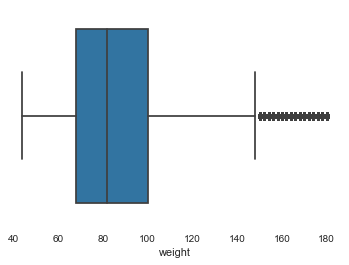

In [40]:
fn.bxplt(df['weight'])

### Age needs was encoded

Age values were encoded based on the median of each age group.


In [41]:
df['age'].value_counts()

30_40      186191
20_30      148259
40_50      116578
50_60       59158
60_70       31074
10_20       18643
70_80        8896
0_10         4407
80_90        1634
90_100        353
100_110        17
Name: age, dtype: int64

In [42]:
age_map = {'0_10' : 5,
          '10_20': 15,
          '20_30' : 25,
          '30_40': 35,
          '40_50': 45,
          '50_60': 55,
          '60_70': 65,
          '70_80': 75,
          '80_90': 85,
          '90_100': 95,
          '100_110': 105}

df['age'] = df['age'].map(age_map)
df['age'].describe()

count    575210.000000
mean         38.048295
std          13.437588
min           5.000000
25%          25.000000
50%          35.000000
75%          45.000000
max         105.000000
Name: age, dtype: float64

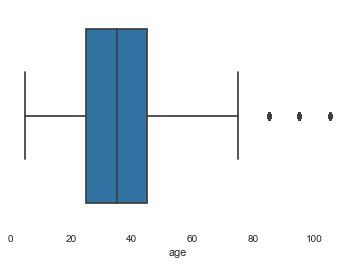

In [43]:
import seaborn as sns
sns.boxplot(df['age']);
plt.show()

### BMI 

(29.0     12353
 29.7     11679
 30.4     11313
 27.7      9320
 28.3      9226
          ...  
 82.8         1
 71.7         1
 104.1        1
 78.4         1
 109.2        1
 Name: bmi, Length: 699, dtype: int64, count    575210.000000
 mean         30.037971
 std           8.044168
 min          10.000000
 25%          24.200000
 50%          28.300000
 75%          34.300000
 max         143.800000
 Name: bmi, dtype: float64, <matplotlib.axes._subplots.AxesSubplot at 0x12a68ebbb38>)

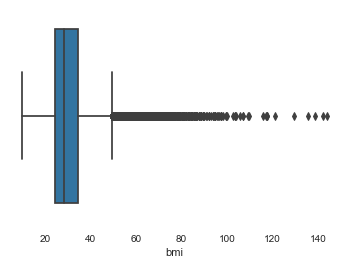

In [44]:
fn.bxplt(df['bmi'])

###  Blood Type, smoking need to be encoded

In [45]:
df['blood_type'].value_counts()

unknown    194513
op         123124
ap         107469
on          50693
bp          35975
an          28422
abp         19503
bn           9277
abn          6234
Name: blood_type, dtype: int64

In [46]:
df['smoking'].value_counts()

never        326888
quit10        55446
yesmedium     50580
vape          37695
quit5         34618
quit0         33149
yeslight      26606
yesheavy      10228
Name: smoking, dtype: int64

### Alcohol & Drugs: Numeric, some/moderate outliers

( 0.0     132092
 -1.0     112941
  1.0      77305
  2.0      55558
  3.0      34201
  4.0      28532
  14.0     26607
  5.0      23456
  7.0      19483
  10.0     17803
  6.0      12762
  12.0      8824
  8.0       7871
  9.0       6465
  13.0      6376
  11.0      4934
 Name: alcohol, dtype: int64, count    575210.000000
 mean          2.672372
 std           4.177297
 min          -1.000000
 25%           0.000000
 50%           1.000000
 75%           4.000000
 max          14.000000
 Name: alcohol, dtype: float64, <matplotlib.axes._subplots.AxesSubplot at 0x12a5763a908>)

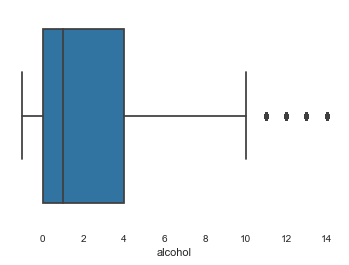

In [47]:
fn.bxplt(df['alcohol'])

(-1.0     300620
  0.0     168057
  28.0     39882
  1.0      16076
  2.0       7928
  3.0       5302
  4.0       4319
  20.0      3736
  5.0       3660
  10.0      3340
  7.0       2785
  14.0      2453
  27.0      2244
  6.0       1732
  25.0      1705
  15.0      1542
  8.0       1346
  24.0      1232
  26.0      1174
  12.0       787
  22.0       700
  23.0       694
  21.0       671
  18.0       635
  9.0        541
  11.0       454
  16.0       407
  17.0       365
  19.0       304
  13.0       267
 -2.0        252
 Name: cannabis, dtype: int64, count    575210.000000
 mean          2.375988
 std           8.075127
 min          -2.000000
 25%          -1.000000
 50%          -1.000000
 75%           0.000000
 max          28.000000
 Name: cannabis, dtype: float64, <matplotlib.axes._subplots.AxesSubplot at 0x12a720b7780>)

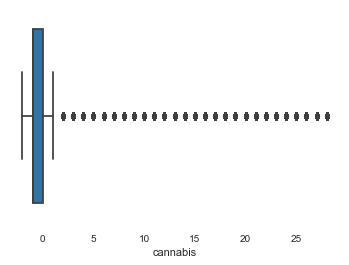

In [48]:
fn.bxplt(df['cannabis'])

In [49]:
df['amphetamines'].value_counts()

-1.0     507348
 0.0      59216
 1.0       1832
 28.0      1640
 2.0       1023
 3.0        629
 4.0        496
 5.0        439
 10.0       300
 7.0        294
-2.0        231
 20.0       215
 6.0        211
 14.0       196
 15.0       147
 27.0       136
 8.0        125
 25.0        92
 24.0        91
 9.0         77
 12.0        65
 26.0        64
 22.0        61
 23.0        59
 11.0        43
 21.0        38
 18.0        38
 19.0        34
 16.0        29
 17.0        23
 13.0        18
Name: amphetamines, dtype: int64

In [50]:
df['cocaine'].value_counts()

-1.0     491189
 0.0      76735
 1.0       2961
 2.0       1217
 3.0        684
 4.0        530
 5.0        340
 7.0        208
 6.0        188
 10.0       167
 28.0       157
 8.0        138
-2.0        134
 14.0        93
 20.0        75
 12.0        56
 9.0         47
 15.0        46
 27.0        36
 25.0        32
 17.0        21
 16.0        21
 11.0        19
 19.0        18
 24.0        18
 18.0        17
 23.0        15
 21.0        13
 22.0        13
 26.0        12
 13.0        10
Name: cocaine, dtype: int64

In [51]:
df['lsd'].value_counts()

-1.0     502197
 0.0      69504
 1.0       2175
 2.0        520
 3.0        182
-2.0        150
 4.0        112
 5.0         70
 28.0        56
 7.0         43
 6.0         36
 8.0         29
 10.0        26
 27.0        21
 9.0         15
 14.0         9
 12.0         9
 24.0         9
 20.0         8
 11.0         7
 18.0         6
 13.0         4
 26.0         4
 17.0         4
 15.0         3
 23.0         3
 19.0         2
 22.0         2
 25.0         2
 21.0         1
 16.0         1
Name: lsd, dtype: int64

In [52]:
df['mdma'].value_counts()


-1.0     500992
 0.0      71143
 1.0       1809
 2.0        416
 3.0        184
-2.0        163
 4.0        108
 5.0         91
 28.0        44
 7.0         39
 6.0         37
 10.0        33
 8.0         31
 9.0         22
 20.0        13
 27.0        12
 14.0        12
 11.0        10
 15.0         8
 26.0         6
 18.0         5
 17.0         5
 22.0         4
 13.0         4
 24.0         4
 12.0         4
 25.0         3
 21.0         3
 16.0         3
 23.0         1
 19.0         1
Name: mdma, dtype: int64

(21.0    80797
 3.0     71691
 4.0     61710
 1.0     61280
 2.0     59036
 5.0     54654
 10.0    42543
 6.0     34862
 0.0     20221
 8.0     19196
 7.0     19079
 15.0    14034
 20.0    10077
 12.0     8580
 9.0      6954
 11.0     2932
 14.0     2466
 13.0     1961
 16.0     1258
 18.0      876
 17.0      728
 19.0      275
 Name: contacts_count, dtype: int64, count    575210.000000
 mean          7.399658
 std           6.746050
 min           0.000000
 25%           3.000000
 50%           5.000000
 75%          10.000000
 max          21.000000
 Name: contacts_count, dtype: float64, <matplotlib.axes._subplots.AxesSubplot at 0x12a68150320>)

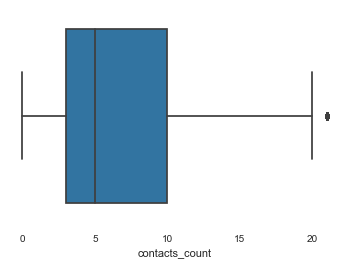

In [53]:
fn.bxplt(df['contacts_count'])

### Behaviors: House Count, Contacts Count, Text Working, Rate Reducing Single, Rate Reducing Mask

(2     183291
 3     124509
 4     115330
 5      60154
 1      50443
 6      24028
 7       9125
 8       4157
 9       1583
 10      1336
 11      1254
 Name: house_count, dtype: int64, count    575210.000000
 mean          3.190734
 std           1.553937
 min           1.000000
 25%           2.000000
 50%           3.000000
 75%           4.000000
 max          11.000000
 Name: house_count, dtype: float64, <matplotlib.axes._subplots.AxesSubplot at 0x12a6e761f60>)

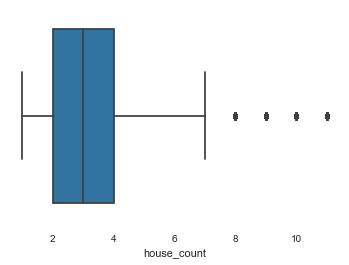

In [54]:
fn.bxplt(df['house_count'])

(1.0    178934
 2.0    159530
 3.0    114260
 4.0     92806
 5.0     29680
 Name: rate_reducing_mask, dtype: int64, count    575210.000000
 mean          2.365046
 std           1.219106
 min           1.000000
 25%           1.000000
 50%           2.000000
 75%           3.000000
 max           5.000000
 Name: rate_reducing_mask, dtype: float64, <matplotlib.axes._subplots.AxesSubplot at 0x12a6e4ee080>)

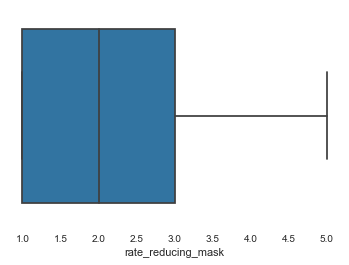

In [55]:
fn.bxplt(df['rate_reducing_mask'])

In [56]:
df.head()

,country,ip_accuracy,sex,age,height,weight,bmi,blood_type,smoking,alcohol,cannabis,amphetamines,cocaine,lsd,mdma,contacts_count,house_count,text_working,rate_government_action,rate_reducing_risk_single,rate_reducing_risk_house,rate_reducing_mask,covid19_positive,covid19_symptoms,covid19_contact,asthma,kidney_disease,compromised_immune,heart_disease,lung_disease,diabetes,hiv_positive,hypertension,other_chronic,prescription_medication,opinion_infection,opinion_mortality,risk_infection,risk_mortality,omwasnull,oiwasnull,taking_prescription_medication
0,US,200.0,female,45,158,114,45.6,ap,quit0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,5.0,4,never,0,0,0,3.0,0,0,0,1,0,1,0,0,0,0,1,1,NO,55.0,35.0,64.248,0.721,False,False,False
1,US,20.0,female,25,168,62,21.9,on,never,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,5.0,3,never,1,1,1,2.0,0,0,0,0,0,0,0,0,0,0,0,0,NO,15.0,15.0,57.549,0.016,False,False,False
2,US,10.0,female,5,136,44,23.7,bp,never,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,4.0,3,stopped,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,NO,35.0,15.0,62.377,0.000,True,True,False
3,US,10.0,female,35,164,112,41.6,abn,quit5,-1.0,28.0,-1.0,-1.0,-1.0,-1.0,4.0,3,never,1,1,0,1.0,0,0,0,1,0,0,0,0,0,0,1,1,ACETAZOLAMIDE;GABAPENTIN;OMEPRAZOLE;VENLAFAXIN...,45.0,25.0,59.258,0.195,False,False,True
4,US,50.0,male,55,184,132,38.9,an,vape,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,10.0,4,travel critical,0,0,0,3.0,0,0,0,0,0,0,0,0,1,0,0,0,METFORMIN HYDROCHLORIDE,15.0,5.0,77.098,2.463,False,False,True


## Further scrubbing and preprocessing;
>* Changing the daatatypes of objects to categories and encoding 
* Dropping additional columns
* Setting the target: "covid19_positive"
* Train/Test Split
* Inspecting Imbalences
   

### Pairing the size of the dataset/changing objects to categories:

In [57]:
df.columns

Index(['country', 'ip_accuracy', 'sex', 'age', 'height', 'weight', 'bmi',
       'blood_type', 'smoking', 'alcohol', 'cannabis', 'amphetamines',
       'cocaine', 'lsd', 'mdma', 'contacts_count', 'house_count',
       'text_working', 'rate_government_action', 'rate_reducing_risk_single',
       'rate_reducing_risk_house', 'rate_reducing_mask', 'covid19_positive',
       'covid19_symptoms', 'covid19_contact', 'asthma', 'kidney_disease',
       'compromised_immune', 'heart_disease', 'lung_disease', 'diabetes',
       'hiv_positive', 'hypertension', 'other_chronic',
       'prescription_medication', 'opinion_infection', 'opinion_mortality',
       'risk_infection', 'risk_mortality', 'omwasnull', 'oiwasnull',
       'taking_prescription_medication'],
      dtype='object')

In [58]:
df.astype({'country' : 'category', 'sex' : 'category', 'blood_type' : 'category',
           'smoking': 'category', 'text_working' : 'category', 'prescription_medication' : 'category'})

,country,ip_accuracy,sex,age,height,weight,bmi,blood_type,smoking,alcohol,cannabis,amphetamines,cocaine,lsd,mdma,contacts_count,house_count,text_working,rate_government_action,rate_reducing_risk_single,rate_reducing_risk_house,rate_reducing_mask,covid19_positive,covid19_symptoms,covid19_contact,asthma,kidney_disease,compromised_immune,heart_disease,lung_disease,diabetes,hiv_positive,hypertension,other_chronic,prescription_medication,opinion_infection,opinion_mortality,risk_infection,risk_mortality,omwasnull,oiwasnull,taking_prescription_medication
0,US,200.0,female,45,158,114,45.6,ap,quit0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,5.0,4,never,0,0,0,3.0,0,0,0,1,0,1,0,0,0,0,1,1,NO,55.0,35.0,64.248,0.721,False,False,False
1,US,20.0,female,25,168,62,21.9,on,never,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,5.0,3,never,1,1,1,2.0,0,0,0,0,0,0,0,0,0,0,0,0,NO,15.0,15.0,57.549,0.016,False,False,False
2,US,10.0,female,5,136,44,23.7,bp,never,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,4.0,3,stopped,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,NO,35.0,15.0,62.377,0.000,True,True,False
3,US,10.0,female,35,164,112,41.6,abn,quit5,-1.0,28.0,-1.0,-1.0,-1.0,-1.0,4.0,3,never,1,1,0,1.0,0,0,0,1,0,0,0,0,0,0,1,1,ACETAZOLAMIDE;GABAPENTIN;OMEPRAZOLE;VENLAFAXIN...,45.0,25.0,59.258,0.195,False,False,True
4,US,50.0,male,55,184,132,38.9,an,vape,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,10.0,4,travel critical,0,0,0,3.0,0,0,0,0,0,0,0,0,1,0,0,0,METFORMIN HYDROCHLORIDE,15.0,5.0,77.098,2.463,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619022,CA,5.0,female,25,168,94,33.3,unknown,never,2.0,4.0,-1.0,-1.0,-1.0,-1.0,3.0,3,stopped,1,1,1,2.0,0,0,0,0,0,0,0,0,0,0,0,0,NO,35.0,15.0,57.835,0.017,False,False,False
619023,US,5.0,female,35,174,124,40.9,op,never,1.0,14.0,-1.0,-1.0,-1.0,-1.0,10.0,5,home,0,1,1,3.0,0,0,0,0,0,0,0,0,0,0,1,0,NO,55.0,25.0,59.874,0.078,False,False,False
619024,US,5.0,female,45,166,74,26.8,unknown,never,1.0,-1.0,28.0,-1.0,-1.0,-1.0,21.0,4,travel critical,-1,1,2,4.0,0,0,0,0,0,0,0,0,0,0,0,0,AMPHETAMINE ASPARTATE;AMPHETAMINE SULFATE;DEXT...,85.0,5.0,67.718,0.294,False,False,True
619025,US,20.0,female,45,166,90,32.6,an,quit10,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,21.0,2,travel critical,1,1,0,2.0,0,0,1,0,0,0,0,0,0,0,0,0,ALPRAZOLAM;HYDROXYZINE HYDROCHLORIDE;MONTELUKA...,25.0,15.0,72.490,0.582,False,False,True


### Main Dataset:

**columns dropped:**

**ip_accuracy** - This feature measures the accuracy of the IP location and is used in the data collection process rather than for predicting a medical condition.

**risk_infection** - This is a value calculated post-hoc, based on the data collected from this dataset

**risk_mortality** - This is a value calculated post-hoc, based on the data collected from this dataset

**prescription_medication** - This column contains text-strings and has over 57K values.  It's proposed to deal with this column separately if it's indicated to be a factor separately since this is computationally expensive.

In [59]:
df.drop('ip_accuracy', axis=1, inplace=True)


In [60]:
df.drop('risk_infection', axis=1, 
        inplace=True)

In [61]:
df.drop('risk_mortality', axis=1, inplace=True)

In [62]:
df1 = df.drop('prescription_medication', axis=1)

In [63]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 575210 entries, 0 to 619026
Data columns (total 38 columns):
country                           575210 non-null object
sex                               575210 non-null object
age                               575210 non-null int64
height                            575210 non-null int64
weight                            575210 non-null int64
bmi                               575210 non-null float64
blood_type                        575210 non-null object
smoking                           575210 non-null object
alcohol                           575210 non-null float64
cannabis                          575210 non-null float64
amphetamines                      575210 non-null float64
cocaine                           575210 non-null float64
lsd                               575210 non-null float64
mdma                              575210 non-null float64
contacts_count                    575210 non-null float64
house_count                  

### Encoding dataset

In [64]:
df2 = pd.get_dummies(df1)
df2.head()

,age,height,weight,bmi,alcohol,cannabis,amphetamines,cocaine,lsd,mdma,contacts_count,house_count,rate_government_action,rate_reducing_risk_single,rate_reducing_risk_house,rate_reducing_mask,covid19_positive,covid19_symptoms,covid19_contact,asthma,kidney_disease,compromised_immune,heart_disease,lung_disease,diabetes,hiv_positive,hypertension,other_chronic,opinion_infection,opinion_mortality,omwasnull,oiwasnull,taking_prescription_medication,country_AD,country_AE,country_AF,country_AG,country_AI,country_AL,country_AM,...,country_TT,country_TW,country_UA,country_UG,country_US,country_UY,country_UZ,country_VE,country_VI,country_VN,country_WS,country_YE,country_ZA,country_ZM,country_ZW,sex_female,sex_male,sex_other,blood_type_abn,blood_type_abp,blood_type_an,blood_type_ap,blood_type_bn,blood_type_bp,blood_type_on,blood_type_op,blood_type_unknown,smoking_never,smoking_quit0,smoking_quit10,smoking_quit5,smoking_vape,smoking_yesheavy,smoking_yeslight,smoking_yesmedium,text_working_home,text_working_never,text_working_stopped,text_working_travel critical,text_working_travel non critical
0,45,158,114,45.6,0.0,0.0,-1.0,-1.0,-1.0,-1.0,5.0,4,0,0,0,3.0,0,0,0,1,0,1,0,0,0,0,1,1,55.0,35.0,False,False,False,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,25,168,62,21.9,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,5.0,3,1,1,1,2.0,0,0,0,0,0,0,0,0,0,0,0,0,15.0,15.0,False,False,False,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,5,136,44,23.7,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,4.0,3,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,35.0,15.0,True,True,False,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,35,164,112,41.6,-1.0,28.0,-1.0,-1.0,-1.0,-1.0,4.0,3,1,1,0,1.0,0,0,0,1,0,0,0,0,0,0,1,1,45.0,25.0,False,False,True,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,55,184,132,38.9,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,10.0,4,0,0,0,3.0,0,0,0,0,0,0,0,0,1,0,0,0,15.0,5.0,False,False,True,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [65]:
df2.describe()

,age,height,weight,bmi,alcohol,cannabis,amphetamines,cocaine,lsd,mdma,contacts_count,house_count,rate_government_action,rate_reducing_risk_single,rate_reducing_risk_house,rate_reducing_mask,covid19_positive,covid19_symptoms,covid19_contact,asthma,kidney_disease,compromised_immune,heart_disease,lung_disease,diabetes,hiv_positive,hypertension,other_chronic,opinion_infection,opinion_mortality,country_AD,country_AE,country_AF,country_AG,country_AI,country_AL,country_AM,country_AR,country_AT,country_AU,...,country_TT,country_TW,country_UA,country_UG,country_US,country_UY,country_UZ,country_VE,country_VI,country_VN,country_WS,country_YE,country_ZA,country_ZM,country_ZW,sex_female,sex_male,sex_other,blood_type_abn,blood_type_abp,blood_type_an,blood_type_ap,blood_type_bn,blood_type_bp,blood_type_on,blood_type_op,blood_type_unknown,smoking_never,smoking_quit0,smoking_quit10,smoking_quit5,smoking_vape,smoking_yesheavy,smoking_yeslight,smoking_yesmedium,text_working_home,text_working_never,text_working_stopped,text_working_travel critical,text_working_travel non critical
count,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.00000,575210.000000,575210.000000,...,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000,575210.000000
mean,38.048295,169.063834,86.105141,30.037971,2.672372,2.375988,-0.726154,-0.801010,-0.857699,-0.856922,7.399658,3.190734,0.321573,1.013882,0.869884,2.365046,0.001375,0.016495,0.035511,0.161657,0.003100,0.061310,0.015657,0.012322,0.059789,0.003077,0.128171,0.075206,36.089480,20.279585,0.000002,0.000209,0.000012,0.000003,0.000007,0.000019,0.000016,0.00025,0.000177,0.010888,...,0.000024,0.000101,0.000231,0.000009,0.880816,0.000017,0.000007,0.000014,0.000061,0.000061,0.000002,0.000002,0.000982,0.000007,0.000005,0.700464,0.295911,0.003625,0.010838,0.033906,0.049412,0.186834,0.016128,0.062542,0.088130,0.214051,0.338160,0.568293,0.057629,0.096393,0.060183,0.065533,0.017781,0.046254,0.087933,0.062092,0.159272,0.434109,0.259803,0.084724
std,13.437588,11.101964,24.486852,8.044168,4.177297,8.075127,1.924783,0.933992,0.562558,0.543600,6.746050,1.553937,0.858836,0.553701,0.654685,1.219106,0.037058,0.127369,0.185066,0.368137,0.055589,0.239898,0.124144,0.110321,0.237095,0.055387,0.334280,0.263723,20.097658,19.947894,0.001319,0.014442,0.003488,0.001865,0.002637,0.004373,0.003956,0.01582,0.013315,0.103777,...,0.004933,0.010041,0.015204,0.002948,0.324006,0.004169,0.002637,0.003729,0.007800,0.007800,0.001319,0.001319,0.031325,0.002637,0.002284,0.458055,0.456452,0.060097,0.103539,0.180987,0.216726,0.389779,0.125968,0.242138,0.283483,0.410162,0.473084,0.495314,0.233041,0.295129,0.237826,0.247463,0.132156,0.210036,0.283198,0.241323,0.365930,0.495640,0.438527,0.278471
min,5.000000,110.000000,44.000000,10.000000,-1.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,0.000000,1.000000,-2.000000,-2.000000,-2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,

## Train/Test Split:

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
y = df2['covid19_positive'].copy()
X = df2.drop('covid19_positive', axis=1).copy()


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.25, stratify=y, random_state=123)

In [69]:
len(X_test)

143803

In [70]:
len(y_test)

143803

In [71]:
len(y_train)

431407

In [72]:
len(X_train)

431407

### Inspecting training set  for imbalance 

In [73]:
y_train.value_counts()

0    430814
1       593
Name: covid19_positive, dtype: int64

In [74]:
y_test.value_counts()

0    143605
1       198
Name: covid19_positive, dtype: int64

## Modeling:  Using 'vanilla' Decision Tree and SMOTE to address imbalances

* Also using the parameter of class_weight='balanced' to address the large imbalance in classes.




In [75]:
smote = SMOTE(random_state=123)
X_train_res, y_train_res = smote.fit_sample(X_train, y_train)
# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_res).value_counts()) 

-----------------------------------------
Synthetic sample class distribution: 

1    430814
0    430814
dtype: int64


Using a 'balanced' class_weight to aleviate the very high imbalanced class weight 

In [76]:
tree = DecisionTreeClassifier(class_weight='balanced')
tree.fit(X_train_res, y_train_res)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [77]:
y_hat_test = tree.predict(X_test)

,precision,recall,f1-score,support
0,0.999,0.998,0.998,143605.000
1,0.041,0.061,0.049,198.000
accuracy,0.997,0.997,0.997,0.997
macro avg,0.520,0.529,0.524,143803.000
weighted avg,0.997,0.997,0.997,143803.000


___________________________________________


Training Accuracy :  0.9999988394063332
Test Accuracy :  0.9967525016863348
___________________________________________


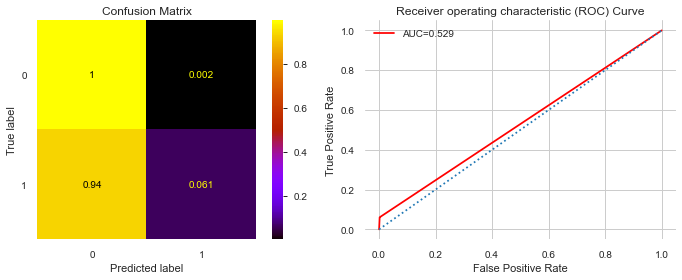

In [78]:
fn.evaluate_model(X_test, y_test, y_hat_test, X_train_res, y_train_res, tree)

In [79]:
importlib.reload(fn)

2020-04-23 14:52:12.014637-07:00
[i] Timer started at04/23/20 - 02:52 PM
[i] Timer ended at 04/23/20 - 02:52 PM
- Total time = 0:00:00


<module 'functions' from 'C:\\Users\\aosika\\flatiron-ds-course\\mod3_v21\\dsc-mod-3-project-v2-1-online-ds-pt-100719\\functions.py'>

In [80]:
print(pd.Series(y_train_res).value_counts()) 

1    430814
0    430814
dtype: int64


In [81]:
y_test.value_counts()

0    143605
1       198
Name: covid19_positive, dtype: int64

Looking at factors:

In [82]:
df_import = pd.DataFrame(tree.feature_importances_, X_train.columns)
df_import.reset_index(inplace=True)
df_import.columns = ['factor', 'coef']
df_import.sort_values('coef', ascending=False).head(20)

,factor,coef
16,covid19_symptoms,0.327107
27,opinion_infection,0.301698
29,omwasnull,0.068402
13,rate_reducing_risk_single,0.038496
17,covid19_contact,0.029578
217,smoking_never,0.027741
218,smoking_quit0,0.021535
227,text_working_stopped,0.019056
226,text_working_never,0.016260
23,diabetes,0.014809


#### Observations for first vanilla DecisionTree Classifier using SMOTE:

> This model out of the box trained very poorly.  It is obviously overtrained and the recall and precision for true positives leave much to be desired with a recall of ~.11

Recording top factors: 


1. covid19_symptoms	0.327107
2.	opinion_infection	0.301703
-	oiwasnull	0.039126
-	rate_reducing_risk_single	0.038522
-	covid19_contact	0.029836
-	omwasnull	0.029283
-	smoking_never	0.026795
-	smoking_quit0	0.021534
-	text_working_stopped	0.019059
-	text_working_never	0.016270
-	diabetes	0.014808
-	blood_type_abp	0.011600
-	text_working_travel critical	0.010846
-	rate_reducing_risk_house	0.010533
-	blood_type_unknown	0.008998
-	country_US	0.008763
-	country_GB	0.007063
-	rate_government_action	0.007048
-	text_working_home	0.006663
	blood_type_bp	0.005332

​


In [83]:
#fn.df_importance(tree)

In [84]:

#df_import_tree = pd.Series(tree.feature_importances_, index=X_train.columns, name='importance').head(20)
# df_import_tree.sort_values().plot(kind='barh', figsize=(15,12))

In [85]:
importlib.reload(fn)

2020-04-23 14:52:12.142296-07:00
[i] Timer started at04/23/20 - 02:52 PM
[i] Timer ended at 04/23/20 - 02:52 PM
- Total time = 0:00:00


<module 'functions' from 'C:\\Users\\aosika\\flatiron-ds-course\\mod3_v21\\dsc-mod-3-project-v2-1-online-ds-pt-100719\\functions.py'>

#### using UnderSampling

In [86]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=123)

In [87]:
X_train_rus, y_train_rus = rus.fit_sample(X_train, y_train)


In [88]:
clf = DecisionTreeClassifier(class_weight='balanced', random_state=123)
clf.fit(X_train_rus, y_train_rus)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [89]:
y_hat_test1 = clf.predict(X_test)


,precision,recall,f1-score,support
0,1.000,0.725,0.841,143605.000
1,0.004,0.773,0.008,198.000
accuracy,0.725,0.725,0.725,0.725
macro avg,0.502,0.749,0.424,143803.000
weighted avg,0.998,0.725,0.839,143803.000


___________________________________________


Training Accuracy :  1.0
Test Accuracy :  0.7253812507388581
___________________________________________


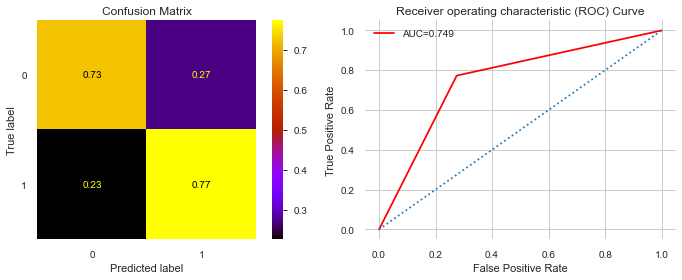

In [90]:
fn.evaluate_model(X_test, y_test, y_hat_test1, X_train_rus, y_train_rus, clf)

In [91]:
importlib.reload(fn)

2020-04-23 14:52:34.603495-07:00
[i] Timer started at04/23/20 - 02:52 PM
[i] Timer ended at 04/23/20 - 02:52 PM
- Total time = 0:00:00.000996


<module 'functions' from 'C:\\Users\\aosika\\flatiron-ds-course\\mod3_v21\\dsc-mod-3-project-v2-1-online-ds-pt-100719\\functions.py'>

In [92]:
# df_import_clf = pd.Series(clf.feature_importances_, index=X_train.columns, name='importance').head(20)
# df_import_clf.sort_values().plot(kind='barh', figsize=(15,12))

In [102]:
fn.df_import(clf, X_train)

,factor,coef
0,opinion_infection,0.273447
1,covid19_symptoms,0.159422
2,bmi,0.0456143
3,alcohol,0.0432441
4,contacts_count,0.0416336
5,weight,0.0353858
6,height,0.0327729
7,oiwasnull,0.0276148
8,opinion_mortality,0.0245959
9,age,0.0236773


#### Observations:
> This model performed poorly and is overfit, and f-1 scores were considerably lower.  The best sampling method in terms of performance appears to be SMOTE despite improved recall scores.

**Recording top factors:**
1.	opinion_infection	0.273447
2.	covid19_symptoms	0.159422
3.	bmi	0.045614
4.	alcohol	0.043244
5.	contacts_count	0.041634
6.	weight	0.035386
7.	height	0.032773
8.	oiwasnull	0.027615
9.	opinion_mortality	0.024596
10.	age	0.023677
11.	rate_reducing_risk_single	0.022256
12.	rate_government_action	0.019973
13.	house_count	0.019576
14.	covid19_contact	0.018271
15.	blood_type_unknown	0.013277
16.	amphetamines	0.012973
17.	rate_reducing_mask	0.012251
18.	hypertension	0.010017
19.	sex_male	0.00991
20.	text_working_never	0.008869
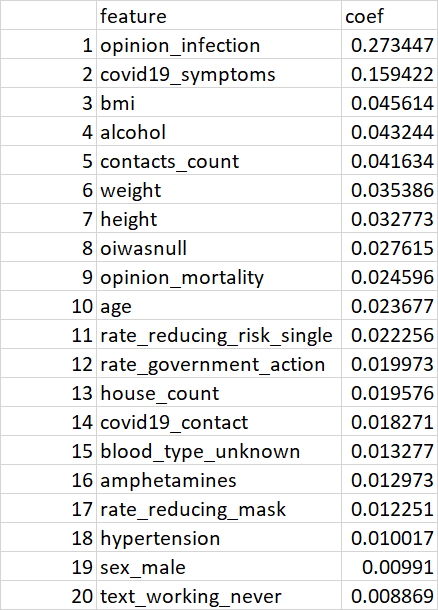

#### Manually hypertuning random undersampling:

In [94]:
clf_rus1 = DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=.2,class_weight='balanced',random_state=123)
clf_rus1.fit(X_train_rus, y_train_rus)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=4, max_features=0.2,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=123, splitter='best')

In [95]:
yhrus = clf_rus1.predict(X_test)

,precision,recall,f1-score,support
0,0.999,0.949,0.974,143605.000
1,0.015,0.551,0.029,198.000
accuracy,0.949,0.949,0.949,0.949
macro avg,0.507,0.750,0.501,143803.000
weighted avg,0.998,0.949,0.972,143803.000


___________________________________________


Training Accuracy :  0.7462057335581788
Test Accuracy :  0.9487284688080221
___________________________________________


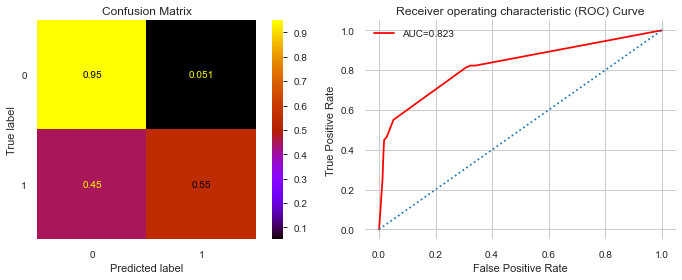

In [96]:
fn.evaluate_model(X_test, y_test, yhrus, X_train_rus, y_train_rus, clf_rus1)

In [97]:
df_import = pd.DataFrame(clf_rus1.feature_importances_, X_train.columns)
df_import.reset_index(inplace=True)
df_import.columns = ['feature', 'coef']
df_import.sort_values('coef', ascending=False).head(20)

,feature,coef
27,opinion_infection,0.478567
16,covid19_symptoms,0.213205
17,covid19_contact,0.167814
13,rate_reducing_risk_single,0.029181
205,sex_female,0.022822
229,text_working_travel non critical,0.018959
2,weight,0.017521
3,bmi,0.016959
6,amphetamines,0.013675
26,other_chronic,0.011582


### Using GridSearchCV to optimize the DecisionTree

In [103]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold( random_state=123)

C:\Users\aosika\AppData\Local\Continuum\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [99]:
from sklearn.model_selection import GridSearchCV


dt_clf1 = DecisionTreeClassifier(class_weight='balanced', random_state=123)
## Set up param grid
param_grid = {'criterion':['gini','entropy'],
             'max_depth':[4,5,7,10],
             'max_features':[60, 70, 80, 85, 90,100]}

## Instantiate GridSearchCV
grid_clf = GridSearchCV(dt_clf1, param_grid, cv=skf)

In [100]:
# time = fn.Timer()
# time.start()
# grid_clf.fit(X_train_res, y_train_res)
# time.stop()

In [101]:
print(f'The best parameters via GridSearchCV: {grid_clf.best_params_}')

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
cv_dt = grid_clf.best_estimator_
cv_dt

In [ ]:
grid_clf.predict(X_test)

#### Applying best parameters from GridSearch 

In [ ]:
clf2 = DecisionTreeClassifier(criterion='gini', max_depth=10, max_features=100, random_state=123)
clf2.fit(X_train_res, y_train_res)

In [ ]:
y_hat_test2 = clf2.predict(X_test)

In [ ]:
fn.evaluate_model(X_test,y_test, y_hat_test2, X_train_res, y_train_res, clf2)

In [ ]:
    df_import = pd.DataFrame(clf2.feature_importances_, X_train.columns)
    df_import.reset_index(inplace=True)
    df_import.columns = ['feature', 'coef']
    df_import.sort_values('coef', ascending=False).head(20)

In [ ]:
clf3 = DecisionTreeClassifier(criterion='gini', max_depth=10, max_features=75, random_state=123)
clf3.fit(X_train_res, y_train_res)

In [ ]:
yh = clf3.predict(X_test)

In [ ]:
fn.evaluate_model(X_test, y_test, yh, X_train_res, X_train_res, clf3)

### manually tuning Decision Tree:

In [ ]:
clf4 = DecisionTreeClassifier(criterion='gini',class_weight='balanced', max_depth=4, max_features=.15, random_state=123)
clf4.fit(X_train_res, y_train_res)

In [ ]:
yh = clf4.predict(X_test)

In [ ]:
fn.evaluate_model(X_test, y_test, yh, X_train_res, y_train_res, clf4)

In [ ]:
    df_import = pd.DataFrame(clf2.feature_importances_, X_train.columns)
    df_import.reset_index(inplace=True)
    df_import.columns = ['feature', 'coef']
    df_import.sort_values('coef', ascending=False).head(20)

#### Trying GridSearch on the Undersample

In [ ]:
time = fn.Timer()
time.start()
grid_clf.fit(X_train_rus, y_train_rus)
time.stop()

In [ ]:
print(f'The best parameters via GridSearchCV: {grid_clf.best_params_}')

#### Observations: 
This model performed poorly again.  Interesting that the testing accuracy is higher than the training accuracy still indicating that the test data isn't from the same sample as the training data.  
> Top Features: 
1. covid19_symptoms	0.362167
2. opinion_infection	0.260554
3.	rate_reducing_risk_single	0.158285
4.	omwasnull	0.033411
5.	covid19_contact	0.025581
-	text_working_stopped	0.022715
-	smoking_quit0	0.019233
- text_working_travel critical	0.013115
-	smoking_never	0.011166
-	text_working_home	0.009152
-	lsd	0.008735
-	age	0.007987
-	text_working_never	0.007480
-	rate_reducing_risk_house	0.007148
-	house_count	0.005771
-	diabetes	0.005338
- opinion_mortality	0.004708
-	blood_type_ap	0.004421
-	asthma	0.002889


### Gridsearch on Random Forest using Undersampling:

In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(class_weight='balanced', random_state=123)
## Set up param grid
param_grid = {'criterion':['gini','entropy'],
             'max_depth':[7,8, 10,15],
             'max_features':[70, 80, 85, 90,100],
             'n_estimators' :[75,100,125, 150]}

## Instantiate GridSearchCV
grid_clf = GridSearchCV(rf_clf, param_grid, cv=skf)

In [ ]:
time = fn.Timer()
time.start()
grid_clf.fit(X_train_rus, y_train_rus)
time.stop()

In [ ]:
print(f" Best parameters found via GridSearchCV:{grid_clf.best_params_}")

In [ ]:
print(f" Best estimators found via GridSearchCV: {grid_clf.best_estimator_}")

#### Applying best parameters found via GriSearchCV

In [ ]:
timer = fn.Timer()
timer.start()
rf_clf = RandomForestClassifier(criterion='gini', max_depth=10, max_features=70, n_estimators=100, random_state=123)

rf_clf.fit(X_train_res, y_train_res)
timer.stop()
mean_rf_cv_score = np.mean(cross_val_score(rf_clf, X_train_rus, y_train_rus, cv=3))

print(f"Mean Cross Validation Score for Random Forest Classifier: {mean_rf_cv_score :.2%}")

In [ ]:
y_hat_test2 = rf_clf.predict(X_test)

In [ ]:
fn.evaluate_model(X_test, y_test, y_hat_test2, X_train_res, y_train_res, rf_clf)

In [ ]:
    df_import = pd.DataFrame(clf2.feature_importances_, X_train.columns)
    df_import.reset_index(inplace=True)
    df_import.columns = ['feature', 'coef']
    df_import.sort_values('coef', ascending=False).head(20)

In [ ]:
df_import_clf = pd.Series(rf_clf.feature_importances_, index=X_train.columns, name='importance').head(20)
df_import_clf.sort_values().plot(kind='barh', figsize=(15,12))

#### Observations using Random Forest Classifier:

> Still having trouble with precision and classifying true positives.  
Top factors remain:
1. Covid19 Symptoms
2. Covid19 Contact
3. bmi
4. weight
5. rate_reducing_single
6. height
7. rate_reducing_risk_house
8. contacts_count
9. age
10. alcohol
11. cannabis
12. rate_reducing_mask 
and 
13. house_count

### GridSearchCV to optimize RandomForrest on SMOTED data:

In [ ]:
# time = fn.Timer()
# time.start()
# rf_clf1 = RandomForestClassifier(class_weight='balanced', random_state=111)
# ## Set up param grid
# param_grid = {'criterion':['gini','entropy'],
#              'max_depth':[2,3,4,5],
#              'max_features':[.2, .3, .4],
#              'n_estimators' :[90,95,100,105]}

# ## Instantiate GridSearchCV
# grid_clff = GridSearchCV(rf_clf1, param_grid, cv=skf,verbose=1, n_jobs=-1)
# time.stop()
# #fit grid
# grid_clff.fit(X_train_res, y_train_res)

# best_parameters = grid_clff.best_params_
# print(f'GridSearch found the following optimal parameters:')
# for param_name in sorted(best_parameters.keys()):
#     print("%s: %r" % (param_name, best_parameters[param_name]))#

In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
time = fn.Timer()
time.start()
rf_clf1 = RandomForestClassifier(class_weight='balanced', random_state=111)
## Set up param grid
param_grid = {'criterion':['gini','entropy'],
             'max_depth':[2,3,4,5],
             'max_features':[.2, .3, .4],
             'n_estimators' :[90,95,100,105]}

## Instantiate GridSearchCV
grid_clff = GridSearchCV(rf_clf1, param_grid, cv=skf,verbose=1, n_jobs=-1)
time.stop()

### GridSearch was too computationally expensive. Will tune Random Forest Manually:


In [ ]:
rf_clf2 = RandomForestClassifier(criterion='gini', max_depth=5, max_features=.3, n_estimators=100, class_weight='balanced', random_state=111)
rf_clf2.fit(X_train_res, y_train_res)

In [ ]:
yh2 = rf_clf2.predict(X_test)

In [ ]:
fn.evaluate_model(X_test, y_test, yh2, X_train_res, y_train_res, rf_clf2)

In [ ]:
time = fn.Timer()
time.start()
rf_clf3 = RandomForestClassifier(criterion='gini', max_depth=3, max_features=.45, n_estimators=95, class_weight='balanced', random_state=111)
rf_clf3.fit(X_train_res, y_train_res)
time.stop()

In [ ]:
yh4= rf_clf3.predict(X_test)


In [ ]:
fn.evaluate_model(X_test,y_test, yh4, X_train_res, y_train_res, rf_clf3)

In [ ]:
    df_import = pd.DataFrame(clf2.feature_importances_, X_train.columns)
    df_import.reset_index(inplace=True)
    df_import.columns = ['feature', 'coef']
    df_import.sort_values('coef', ascending=False).head(20)

#### Observations on manually tuned random forest:

improved recall by .25 and slightly improve the overtrained data.


In [ ]:
time = fn.Timer()
time.start()
rf_clf3 = RandomForestClassifier(criterion='gini', max_depth=2, max_features=.45, n_estimators=80, class_weight='balanced', random_state=111)
rf_clf3.fit(X_train_res, y_train_res)
time.stop()

In [ ]:
yh5=rf_clf3.predict(X_test)

In [ ]:
fn.evaluate_model(X_test, y_test, yh5, X_train_res, y_train_res, rf_clf3)

In [ ]:
df_import = pd.DataFrame(rf_clf3.feature_importances_, X_train.columns)
df_import.reset_index(inplace=True)
df_import.columns = ['feature', 'coef']
df_import.sort_values('coef', ascending=False).head(20)

In [ ]:
df_import.sort_values('coef', ascending=False).head(12).style.bar(subset=['coef'], color='#d65f5f')


In [ ]:

# mean_rfs_cv_score = np.mean(cross_val_score(rf_clf3, X_train_res, y_train_res, cv=3))

# print(f"Mean Cross Validation Score for Random Forest Classifier: {mean_rfs_cv_score :.2%}")


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
time = fn.Timer()
time.start()
rf_clfb = RandomForestClassifier(class_weight='balanced', random_state=111)
## Set up param grid
param_grid = {'criterion':['gini','entropy'],
             'max_depth':[7,8, 10,15],
             'max_features':[.2, .3, .45],
             'n_estimators' :[75,100,125, 150]}

## Instantiate GridSearchCV
rgrid_clfb = RandomizedSearchCV(rf_clfb, param_grid, n_jobs=-1, verbose=1, cv=skf)
time.stop()

In [ ]:
rgrid_clfb.fit(X_train_res, y_train_res)

### Trying XGBoost

In [ ]:
## import xgboost RF
from xgboost import XGBRFClassifier,XGBClassifier
## Fit and Evaluate

xgb_rf = XGBRFClassifier(class_weight='balanced',random_state=123)





In [ ]:
time = fn.Timer()
time.start()
xgb_rf.fit(X_train_res,y_train_res)
time.stop()


In [ ]:
y_train_data = np.array(y_train_res)
X_train_data = np.array(X_train_res)
y_test_data = np.array(y_test)
X_test_data = np.array(X_test)

In [ ]:
print(xgb_rf.score(X_train_data,y_train_data))
print(xgb_rf.score(X_test_data,y_test_data))

In [ ]:
y_hat_test = xgb_rf.predict(X_test_data)

In [ ]:
#fn.evaluate_model(X_test, y_test, y_hat_test, X_train_res, y_train_res, xgb_rf)

#### Observation: Still higher testing score than training score

In [ ]:
df_import_s = pd.Series(clf.feature_importances_, index=X_train.columns, name='importance')


In [ ]:
xgbc = XGBClassifier(class_weight='balanced', random_state=123)
time = fn.Timer()
time.start()
xgbc.fit(X_train_res,y_train_res)
time.stop()

In [ ]:
xgbc.fit(X_train_res, y_train_res)

In [ ]:
print(xgbc.score(X_train_data,y_train_data))
print(xgbc.score(X_test_data,y_test_data))

In [ ]:
y_hat_test = xgbc.predict(X_test_data)

In [ ]:
fn.evaluate_model(X_test_data, y_test_data, y_hat_test, X_train_res, y_train_res, xgbc)

## Appendix: 

In [ ]:
def _plot_classification_report(y_true, y_pred_class):
    import sklearn.metrics as metrics
    report = metrics.classification_report(y_true, y_pred_class, output_dict=True)
    report_df = pd.DataFrame(report).transpose().round(4)

    fig, ax = plt.subplots()
    ax.axis('off')
    ax.axis('tight')
    ax.table(cellText=report_df.values,
             colLabels=report_df.columns,
             rowLabels=report_df.index,
             loc='center',
             bbox=[0.2, 0.2, 0.8, 0.8])
    fig.tight_layout()

    return fig 